In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def _generate_ou_process(len_proc, th = .1, mu = 0, x0 = 0, std = 1):
    """Base generator (has numerical instabilities for big len_proc)"""
    sig = std*np.sqrt(2*th); 
    t = np.linspace(0, len_proc, len_proc)
    ex = np.exp(-th*t);
    return x0*ex+mu*(1-ex)+ (1/np.sqrt(2*th))*\
      sig*ex*np.concatenate([[0],np.cumsum(np.sqrt(np.diff(np.exp(2*th*t)-1))*np.random.randn(len(t)-1))])
    
def generate_ou_process(len_proc, th = .1, mu = 0, x0 = 0, std = 1):
    """Generate OU process
    Args:
        len_proc : lenght of the process
        th : decay speed, .1 has half life of 2 weeks if daily
        mu : mean
        x0 : initial val
        std : stdev of the resulting proc.
    Returns:
        1d array of the process
    """
    proc = _generate_ou_process(len_proc, th = th, mu = mu, x0 = x0, std = std)
    if np.isnan(proc).any():
        return np.concatenate([generate_ou_process(int(len_proc/2), th = th, mu = mu, x0 = x0, std = std),
                               generate_ou_process(len_proc - int(len_proc/2), th = th, mu = mu, x0 = x0, std = std)])
    else:
        return proc

In [15]:
proc = generate_ou_process(2000003, std = 1)
#print(np.std(proc))
#print(np.mean(proc))

/Users/enzo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in exp
/Users/enzo/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:1578: RuntimeWarning: invalid value encountered in subtract
  return a[slice1]-a[slice2]


In [16]:
len(proc)

2000003

In [225]:
mat = np.array([[1,2],
               [3,4]])

In [229]:
mat.reshape([4], order='F').reshape([2,2], order='F')

array([[1, 2],
       [3, 4]])

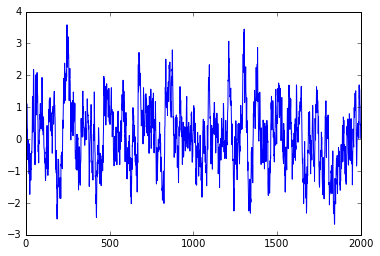

In [160]:
plt.plot(t,x);

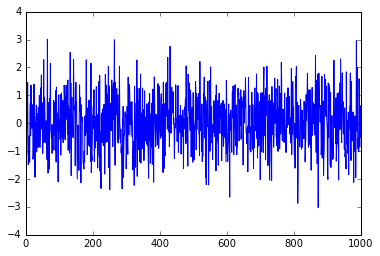

In [144]:
plt.plot(t, np.random.randn(len(t)))